# Word Embeddings - Using Google's Word2Vec and Stanford's GloVe Embedding

Within Natural Language Processing (NLP), a useful tool is Google's Word2Vec. This is a deep-learning inspired method that focuses on the meaning of words. Word2Vec attempts to understand meaning and semantic relationships among words. It works in a way that is similar to deep approaches but is computationally more efficient. 

Stanford researchers also have their own word embedding algorithm like word2vec called Global Vectors for Word Representation, or GloVe for short.

These embedding algorithms are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation. Sentiment analysis is another challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. 

Here is an outline of the remaining blog:
1. Developing my own Word2Vew Embedding using a simple training data
2. Visualising the Word Embedding using PCA
3. Loading Google's Word2Vec Embedding
4. Loading Stanford's GloVe Embedding

## 1. Developing Word2Vec Embedding - simplified training data

Import the Gensim open source NLP library.

In [2]:
from gensim.models import Word2Vec

My training set is an excerpt from a movie review within the IMDB data set (which is my next small project).

In [3]:
# define training data
sentences = [['With', 'the', 'mixed', 'reviews', 'this', 'film', 'got'],
            ['I', 'was', 'not', 'expecting', 'too', 'much'],
            ['A', 'very', 'entertaining', 'small', 'crime', 'film'],
            ['with', 'interesting', 'characters', 'excellent', 'portrayals'],
            ['writing', 'that', 'is', 'breezy', 'without', 'being', 'glib',], 
            ['a', 'good', 'pace']]

In [4]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

Word2Vec(vocab=33, size=100, alpha=0.025)


In [5]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['With', 'the', 'mixed', 'reviews', 'this', 'film', 'got', 'I', 'was', 'not', 'expecting', 'too', 'much', 'A', 'very', 'entertaining', 'small', 'crime', 'with', 'interesting', 'characters', 'excellent', 'portrayals', 'writing', 'that', 'is', 'breezy', 'without', 'being', 'glib', 'a', 'good', 'pace']


In [6]:
# access vector for one word
print(model['film'])

[  1.13449339e-03  -5.11670951e-04   2.08500284e-03  -1.16851697e-04
  -1.08215376e-03  -1.49930851e-03   1.05314224e-03  -4.16729134e-04
  -2.46455893e-03   4.40827385e-03  -7.24913261e-04  -4.73194662e-03
   2.29296833e-03   2.60773697e-04  -3.70110921e-03  -2.02598120e-03
  -4.16703289e-03  -5.17302076e-04  -2.68254429e-03  -3.04167252e-03
  -4.74680244e-04  -1.11178988e-05   1.96223590e-03  -3.90663929e-03
   3.52257327e-03   2.58800387e-03   1.13349874e-03   3.15036392e-03
  -4.86069592e-03  -4.55264607e-03  -3.84059269e-03   4.70914878e-03
   3.28886020e-03   1.94214063e-03   2.72121327e-03  -1.32542755e-03
  -3.39167099e-03  -4.47573327e-03   7.14802532e-04   4.05322947e-03
  -4.53591533e-03  -3.68453818e-03  -4.70294431e-03   7.03372934e-04
  -7.33818335e-04   3.80842830e-03   2.15880014e-03  -4.15752642e-04
  -1.15134113e-03   2.80903419e-03  -4.84162895e-03  -3.47332424e-03
   2.40006670e-03  -2.41541141e-03   5.03918673e-05  -2.62537063e-03
   2.78123887e-03   2.78312131e-03

C:\Users\Cao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
# save model
model.save('model.bin')

It is now possible to use load this model for future use

In [8]:
# load model
new_model = Word2Vec.load('model.bin')

print(new_model)

Word2Vec(vocab=33, size=100, alpha=0.025)


## 2. Visualising the Word Embedding using PCA

Using Principal Component Analysis (PCA), we can visualise the model.

In [9]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [10]:
# create a 2-dimensional PCA model of the word vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\Cao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


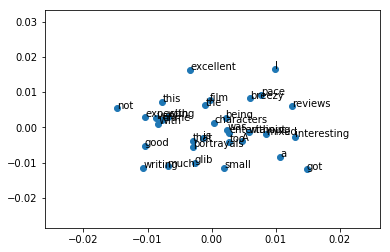

In [11]:
# create a scatter plot 
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

It is hard to derive any meaning out of the graph since only a tiny corpus was used to fit the model.

## 3. Loading Google's Word2Vec Embedding

An alternative to training your own word vectors is to use an existing pre-trained word embedding.

The pre-trained Google word2vec model was trained on Google news data (about 100 billion words). It contains 3 million words and phrases and was fit using 300-dimensional word vectors: GoogleNews-vectors-negative300.bin.gz

This file is 1.53 GB zipped and 3.4 GB unzipped.

In [12]:
from gensim.models import KeyedVectors
filename = 'F:/Python Project Files/GoogleNews-vectors-negative300.bin'
%time model = KeyedVectors.load_word2vec_format(filename, binary=True)

Wall time: 1min 56s


I have a slow machine!

## 4. Loading Stanford's GloVe Embedding

The general consensus is that NLP practitioners currently seem to prefer GloVe over Word2Vec based on results. Looking through Kaggle competitions, I see this trend too.

There is an 822 MB zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

First convert the GloVe file format to the word2vec file format.

In [13]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'C:/Python Project Files/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [14]:
# load the Stanford GloVe model
from gensim.models import KeyedVectors
filename = 'glove.6B.100d.txt.word2vec'
%time model = KeyedVectors.load_word2vec_format(filename, binary=False)

Wall time: 1min 6s


### Testing the model

In [15]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [16]:
model.most_similar("movie")

[('film', 0.9055121541023254),
 ('movies', 0.895932674407959),
 ('films', 0.8663552403450012),
 ('hollywood', 0.8239826560020447),
 ('comedy', 0.8141382932662964),
 ('drama', 0.7655293941497803),
 ('sequel', 0.7644566893577576),
 ('starring', 0.7473924160003662),
 ('remake', 0.7330189943313599),
 ('shows', 0.7167207598686218)]

In [17]:
model.doesnt_match("paris berlin london austria".split())

'austria'